# Libraries Installation

In [73]:
!pip install yfinance -q
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [50]:
import yfinance as yf
import pandas as pd
import numpy as np

# Setup portfolio

In [33]:
buy_orders = {
    "VALE3.SA": 1400,
    "WEGE3.SA": 1300,
    "BPAC11.SA": 1100,
    "KNRI11.SA": 1000,
    "SMAL11.SA": 800,
    "AAPL34.SA": 700,
    "IVVB11.SA": 500,
    "PETR4.SA": 1000,
    "COCA34.SA": 1000,
}

In [34]:
assets = list(buy_orders.keys())

In [35]:
assets

['VALE3.SA',
 'WEGE3.SA',
 'BPAC11.SA',
 'KNRI11.SA',
 'SMAL11.SA',
 'AAPL34.SA',
 'IVVB11.SA',
 'PETR4.SA',
 'COCA34.SA']

In [36]:
total_invested = sum(buy_orders.values())

In [37]:
total_invested

8800

# Import financial assets data

In [38]:
start = "2020-01-01"

assets_history_price = yf.download(assets, start=start, progress=False)["Adj Close"]

# Dummy portfolio simulation

In [47]:
first_line = assets_history_price.iloc[0]
first_line

AAPL34.SA     14.815145
BPAC11.SA     17.714905
COCA34.SA     34.120262
IVVB11.SA    140.600006
KNRI11.SA    178.510574
PETR4.SA      12.180102
SMAL11.SA    139.500000
VALE3.SA      39.578941
WEGE3.SA      16.768709
Name: 2020-01-02 00:00:00, dtype: float64

In [42]:
buy_orders_df = pd.Series(data = buy_orders, index=assets)

In [52]:
number_of_shares = round(buy_orders_df / first_line, 0)

In [56]:
net_worth = assets_history_price * number_of_shares

In [58]:
net_worth["Total net worth"] = net_worth.sum(axis=1)

In [59]:
net_worth

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Total net worth
Date,,,,,,,,,,
2020-01-02,696.311793,1098.324097,989.487602,562.400024,1071.063446,998.768393,837.000000,1385.262947,1307.959316,8946.577619
2020-01-03,697.689195,1101.511440,975.998394,562.799988,1071.063446,990.635223,845.399963,1375.064182,1291.256996,8911.418828
2020-01-06,701.132250,1099.917828,978.863392,564.799988,1062.370239,1002.347118,834.600037,1366.905117,1294.597252,8905.533220
2020-01-07,702.853845,1104.306175,978.863392,565.200012,1066.501923,998.443075,836.399963,1376.848869,1304.618465,8934.035720
2020-01-08,708.764479,1094.519222,978.378849,566.200012,1006.133972,992.261967,829.199982,1377.103748,1255.254627,8807.816858
...,...,...,...,...,...,...,...,...,...,...
2023-08-02,2173.280079,2059.019943,1445.940018,960.799988,962.399963,2503.460056,678.000000,2348.149872,3122.339905,16253.389824
2023-08-03,2201.949928,2070.179962,1457.830013,979.000000,971.100037,2535.440006,677.880020,2362.850075,3153.540024,16409.770065
2023-08-04,2086.800072,2042.900047,1423.320053,966.799988,972.120026,2460.000000,683.099991,2364.599915,3186.299881,16185.939972


# Comparison with IBOV

In [88]:
ibov = yf.download("^BVSP", start=start, progress=False)["Adj Close"]

In [89]:
ibov_df = pd.DataFrame(ibov)

In [90]:
ibov_df.rename(columns={"Adj Close": "IBOV"}, inplace=True)

In [98]:
comparison = pd.merge(ibov_df, net_worth, how = "inner", on = "Date")

In [101]:
comparison

,IBOV,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Total net worth
Date,,,,,,,,,,,
2020-01-02,118573.000000,696.311793,1098.324097,989.487602,562.400024,1071.063446,998.768393,837.000000,1385.262947,1307.959316,8946.577619
2020-01-03,117707.000000,697.689195,1101.511440,975.998394,562.799988,1071.063446,990.635223,845.399963,1375.064182,1291.256996,8911.418828
2020-01-06,116878.000000,701.132250,1099.917828,978.863392,564.799988,1062.370239,1002.347118,834.600037,1366.905117,1294.597252,8905.533220
2020-01-07,116662.000000,702.853845,1104.306175,978.863392,565.200012,1066.501923,998.443075,836.399963,1376.848869,1304.618465,8934.035720
2020-01-08,116247.000000,708.764479,1094.519222,978.378849,566.200012,1006.133972,992.261967,829.199982,1377.103748,1255.254627,8807.816858
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,121248.000000,2201.949928,2095.599953,1429.699978,970.599976,968.339996,2509.200031,678.539978,2386.999893,3109.080048,16350.009781
2023-08-02,120859.000000,2173.280079,2059.019943,1445.940018,960.799988,962.399963,2503.460056,678.000000,2348.149872,3122.339905,16253.389824
2023-08-03,120586.000000,2201.949928,2070.179962,1457.830013,979.000000,971.100037,2535.440006,677.880020,2362.850075,3153.540024,16409.770065


### Data normalization (data scaling)

In [99]:
comparison = comparison.dropna()
comparison_scaling = comparison / comparison.iloc[0]

In [100]:
comparison_scaling

,IBOV,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Total net worth
Date,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.992696,1.001978,1.002902,0.986367,1.000711,1.000000,0.991857,1.010036,0.992638,0.987230,0.996070
2020-01-06,0.985705,1.006923,1.001451,0.989263,1.004267,0.991884,1.003583,0.997133,0.986748,0.989784,0.995412
2020-01-07,0.983883,1.009395,1.005447,0.989263,1.004979,0.995741,0.999674,0.999283,0.993926,0.997446,0.998598
2020-01-08,0.980383,1.017884,0.996536,0.988773,1.006757,0.939378,0.993486,0.990681,0.994110,0.959705,0.984490
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,1.022560,3.162305,1.907998,1.444889,1.725818,0.904092,2.512294,0.810681,1.723138,2.377046,1.827516
2023-08-02,1.019279,3.121131,1.874692,1.461302,1.708393,0.898546,2.506547,0.810036,1.695093,2.387184,1.816716
2023-08-03,1.016977,3.162305,1.884853,1.473318,1.740754,0.906669,2.538567,0.809892,1.705705,2.411038,1.834195


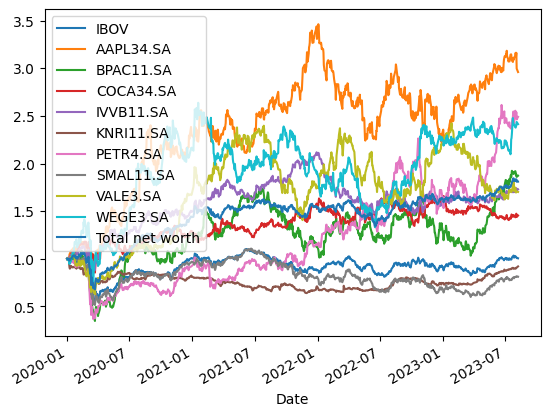

In [102]:
comparison_scaling.plot();

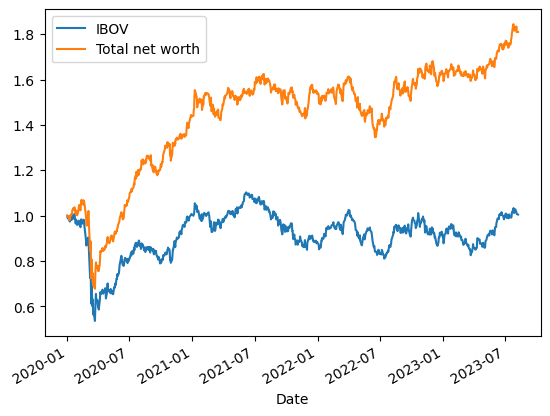

In [104]:
comparison_scaling[["IBOV", "Total net worth"]].plot();